In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, TreeSearch, K2Score, BicScore, BDeuScore, BayesianEstimator, MaximumLikelihoodEstimator
from pgmpy.base import DAG
from sklearn.model_selection import train_test_split
import networkx as nx 

In [3]:
train = pd.read_csv('data/hourly/hourly_data.csv')
stations = train.iloc[:, 4:]
stations = stations.fillna(0).astype(int)
train, test = train_test_split(stations, test_size=0.2,random_state=50, shuffle=True)

In [4]:
import networkx as nx

# assuming `best_model` and `model` are your Bayesian Networks
def consistant_graph(m):
    sorted_nodes = sorted(m.nodes())
    sorted_edges = [(u, v) for (u, v) in m.edges()]

    # create a new directed graph with sorted nodes and edges
    G1 = nx.DiGraph()
    G1.add_nodes_from(sorted_nodes)
    G1.add_edges_from(sorted_edges)

    nx.draw_circular(G1, with_labels=True)


## Structure Learning

Hill Climbing isn't sensitive to order

In [7]:
est = HillClimbSearch(train)
best_model, scores = est.estimate(scoring_method = K2Score(train), epsilon=1e-6)

  0%|          | 0/1000000 [00:00<?, ?it/s]

[-523330.8972960988,
 -498879.0941612046,
 -474725.9319955175,
 -450789.1051575981,
 -427006.4311335515,
 -403390.83696365176,
 -382437.2102915546,
 -362448.2014087867,
 -345139.8397259004,
 -328225.3303687034,
 -313236.56293287297,
 -309353.80842665327,
 -305509.8569833198,
 -302032.2775219907,
 -298701.0307536072,
 -295792.99744637666,
 -292915.8695029305,
 -290091.24059320486,
 -287771.503650306,
 -285970.82117303496,
 -284396.3884133815,
 -283761.18172623566,
 -283261.4524954225,
 -282907.6254323509,
 -282590.50157871755,
 -282311.83487716253,
 -282046.60137942125,
 -281905.8292571295]

## Estimate Parameters

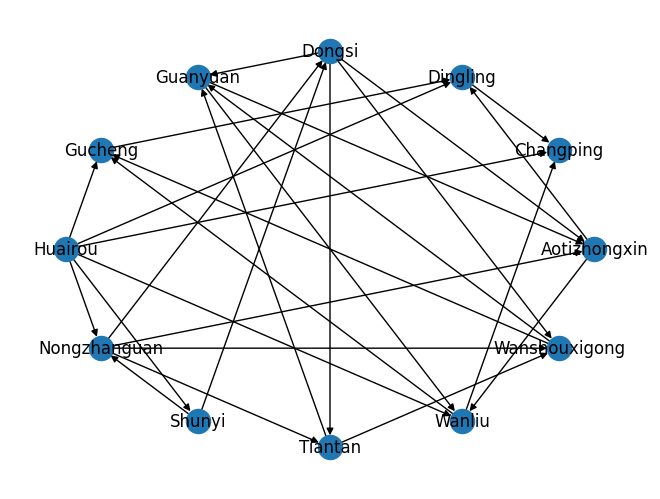

In [35]:
model = BayesianNetwork(best_model.edges())
consistant_graph(model)

In [7]:
train_k2 = K2Score(train)
test_k2 = K2Score(test)
print(train_k2.score(model))
print(test_k2.score(model))

-281905.82925712946
-73426.85362334731


In [8]:
model.fit(train, estimator=BayesianEstimator, prior_type = 'K2')

In [9]:
model.check_model()

True

In [10]:
train_acc_dict = {}
for col in stations.columns:
    inputs = train.drop(columns=col)
    pred = model.predict(inputs)
    true_val = train[col].values
    acc = (true_val == pred.values).mean()
    train_acc_dict[col] = acc

  0%|          | 0/10795 [00:00<?, ?it/s]

  0%|          | 0/10745 [00:00<?, ?it/s]

  0%|          | 0/11229 [00:00<?, ?it/s]

  0%|          | 0/10819 [00:00<?, ?it/s]

  0%|          | 0/11371 [00:00<?, ?it/s]

  0%|          | 0/11162 [00:00<?, ?it/s]

  0%|          | 0/11141 [00:00<?, ?it/s]

  0%|          | 0/11293 [00:00<?, ?it/s]

  0%|          | 0/11156 [00:00<?, ?it/s]

  0%|          | 0/11217 [00:00<?, ?it/s]

  0%|          | 0/10801 [00:00<?, ?it/s]

  0%|          | 0/10578 [00:00<?, ?it/s]

In [13]:
train_acc_dict

{'Gucheng': 0.22862040876388667,
 'Huairou': 0.23255457050027215,
 'Tiantan': 0.22224675917344391,
 'Changping': 0.22829936633049525,
 'Guanyuan': 0.2260202427399024,
 'Nongzhanguan': 0.21639523515864828,
 'Wanliu': 0.22281564156150083,
 'Dongsi': 0.21852601697620638,
 'Wanshouxigong': 0.2211684447228912,
 'Aotizhongxin': 0.22230830263238108,
 'Dingling': 0.2214008689472278,
 'Shunyi': 0.2235423312097722}

In [12]:
test_acc_dict = {}
for col in stations.columns:
    inputs = test.drop(columns=col)
    pred = model.predict(inputs)
    true_val = test[col].values
    acc = (true_val == pred.values).mean()
    test_acc_dict[col] = acc

  0%|          | 0/3597 [00:00<?, ?it/s]

  0%|          | 0/3545 [00:00<?, ?it/s]

  0%|          | 0/3690 [00:00<?, ?it/s]

  0%|          | 0/3557 [00:00<?, ?it/s]

  0%|          | 0/3712 [00:00<?, ?it/s]

  0%|          | 0/3662 [00:00<?, ?it/s]

  0%|          | 0/3648 [00:00<?, ?it/s]

  0%|          | 0/3715 [00:00<?, ?it/s]

  0%|          | 0/3672 [00:00<?, ?it/s]

  0%|          | 0/3708 [00:00<?, ?it/s]

  0%|          | 0/3559 [00:00<?, ?it/s]

  0%|          | 0/3551 [00:00<?, ?it/s]

In [14]:
test_acc_dict

{'Gucheng': 0.23130748869575068,
 'Huairou': 0.23239337004433455,
 'Tiantan': 0.2259071778635871,
 'Changping': 0.22473813629488362,
 'Guanyuan': 0.2285283514031274,
 'Nongzhanguan': 0.22011784392835543,
 'Wanliu': 0.2255092084287702,
 'Dongsi': 0.22190660196381334,
 'Wanshouxigong': 0.22470222897245545,
 'Aotizhongxin': 0.22544265992010235,
 'Dingling': 0.21980518996630669,
 'Shunyi': 0.22701934922796918}

In [15]:
train_k2 = K2Score(train)
test_k2 = K2Score(test)
print(train_k2.score(model))
print(test_k2.score(model))

-281905.82925712946
-73426.85362334731


## Adding a starting structure

Try doing from wind direction SouthWest. Use an easy simple structure, connect only a few to start

{'Tiantan', 'Dongsi', 'Shunyi', 'Wanliu', 'Nongzhanguan', 'Gucheng', 'Wanshouxigong'}
{'Guanyuan', 'Changping', 'Aotizhongxin', 'Dingling', 'Huairou'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

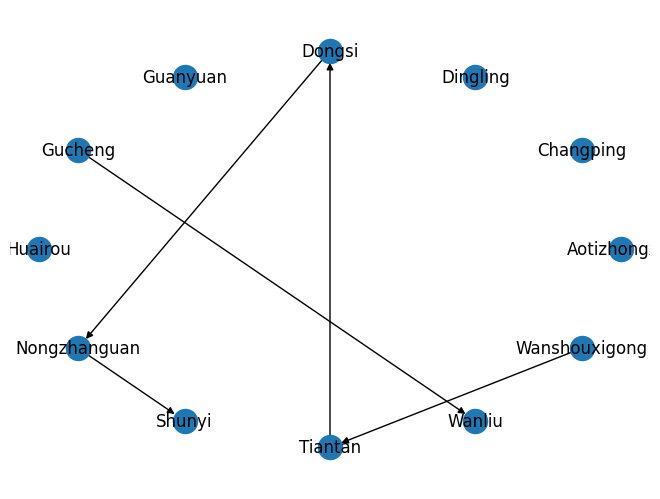

In [62]:
hc = HillClimbSearch(train)
init_model = DAG()
init_model.add_edges_from([('Gucheng', 'Wanliu'),
                              ('Wanshouxigong', 'Tiantan'),
                              ('Tiantan', 'Dongsi'),
                              ('Dongsi', 'Nongzhanguan'),
                              ('Nongzhanguan', 'Shunyi')
                              ])
pairs = [('Gucheng', 'Wanliu'),
                              ('Wanshouxigong', 'Tiantan'),
                              ('Tiantan', 'Dongsi'),
                              ('Dongsi', 'Nongzhanguan'),
                              ('Nongzhanguan', 'Shunyi')
                              ]
unique_stations_from_pairs = set(station for pair in pairs for station in pair)
print(unique_stations_from_pairs)
all_stations = train_acc_dict.keys()
stations_not_in_pairs = set(all_stations) - unique_stations_from_pairs
print(stations_not_in_pairs)
init_model.add_nodes_from(stations_not_in_pairs)
consistant_graph(init_model)
new_est = hc.estimate(scoring_method= K2Score(train), start_dag=init_model)

In [57]:
init_model

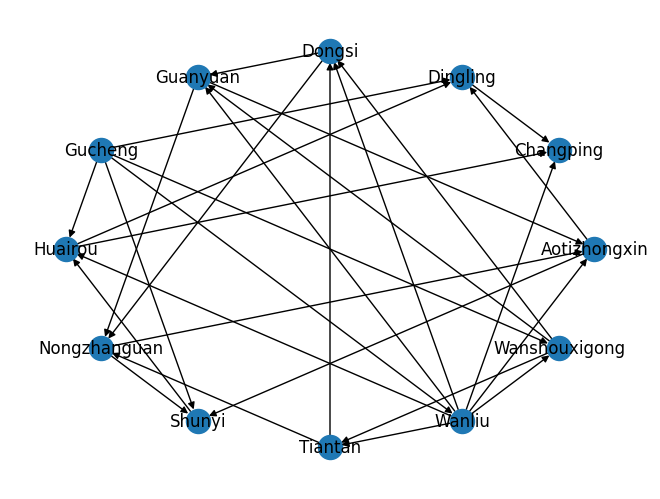

In [63]:
consistant_graph(new_est)

In [64]:
model2 = BayesianNetwork(new_est.edges())
train_k2 = K2Score(train)
test_k2 = K2Score(test)
print(train_k2.score(model2))
print(test_k2.score(model2))

-281330.2917374641
-73486.14907958003
